In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supervised vs unsupervised learning

- In **supervised** learning we have a dataset consisting of number of features and some known labels.
    - The task is to first **learn** the relationship between features and labels.
    - And then **predict** the labels of new data points whose labels are unknown (in the test set, we _pretend_ labels are unknown and then compare our predictions with the real labels).
    - Labels can be continuous (regression) or categorical (classification).
    
- In **unsupervised** learning we start from an unlabeled dataset with only features.
    - The task is to find some patterns in the data that allow us to:
        - Group the data points into separate **clusters**.
        - Discard some features, find a compressed representation of our data (**dimensionality reduction**), which helps some algorithms.
    - Some algorithms can use these patterns to transform new, unseen data, but it's not really a prediction.

# Clustering
### Unsupervised task where we create the class labels.

# K-means
Basic clustering algorithm.
![kmeans](https://i1.wp.com/www.learnbymarketing.com/wp-content/uploads/2015/01/method-k-means-steps-example.png)

Popular because it's easy to implement an understand. However, very sensitive to initialization state.

Since we use libraries, we should choose algorithms based on performance.

In [2]:
import sklearn
print(sklearn.__version__)

0.23.2


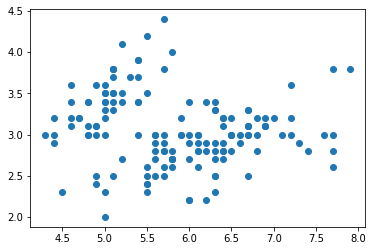

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

x, y = load_iris(return_X_y=True, as_frame=True) # We are only going to use x!

# We don't make train-test splits in unsupervised learning (in general).
# There are no known labels we can test!

plt.scatter(x.iloc[:, 0], x.iloc[:, 1])

plt.show()

In [4]:
class KMeansClust():
    def __init__(self):
        # Instead of passing arguments through methods,
        # we can store them all in the object and
        # they will be accessible to every method.
        
        # K-means parameters.
        self.k = None
        self.labels = None
        self.centroids = None
        
        # Implementation parameters.
        self.random_state = None
        self.distance = None
        self.maxiter = None
        
        # Diagnostic parameters.
        self.niter = 0
        self.cost = 0
        self.converged = False
    
    def init_centroids(self, x):
        np.random.seed(self.random_state)
        
        self.centroids = pd.DataFrame(np.zeros((self.k, x.shape[1])), columns=x.columns)
        for col in x:
            self.centroids[col] = np.random.uniform(x[col].min(), x[col].max(), self.k)
            
        # Where's the return?
        
    def euclidean(self, a, b):
        return np.sqrt(((a - b)**2).sum())
    
    def choose_distance(self):
        if self.distance == 'euclidean':
            return self.euclidean
        #elif self.distance == 'new_distance':
        #    return self.new_distance
        else:
            raise ValueError('distance argument must be "euclidean"')        
    
    def find_closest_centroid(self, x):
        distance = self.choose_distance()
        return self.centroids.apply(lambda c: distance(x, c), axis=1).idxmin()
        
    def compute_centroids(self, x):
        return x.groupby(model.labels).mean()
    
    def fit(self, x, k, random_state=None, distance='euclidean', maxiter=100):
        self.k = k
        self.random_state = random_state
        self.distance = distance
        self.maxiter = maxiter
        
        self.init_centroids(x)
        
        np.random.seed(self.random_state)
        while not self.converged:
            self.niter += 1
            
            # Compute the new labels and centroids.
            self.labels = x.apply(self.find_closest_centroid, axis=1)
            centroids = self.compute_centroids(x)
            
            # Check for convergence.
            cost = model.euclidean(centroids, model.centroids).mean()
            if np.isclose(cost, self.cost):
                self.converged = True
            
            self.centroids = centroids
            self.cost = cost
            
            if self.niter >= self.maxiter:
                break
                
        # Where's the return?
        
        # This could also be done with a for.
        #for i in range(self.maxiter):
        #    self.niter += 1
        #    
        #    self.labels = x.apply(self.find_closest_centroid, axis=1)
        #    centroids = self.compute_centroids()
        #    
        #    if math.isclose(centroids, self.centroids):
        #        self.converged = True
        #        self.centroids = centroids
        #        break

In [5]:
model = KMeansClust()
model.fit(x, 2)

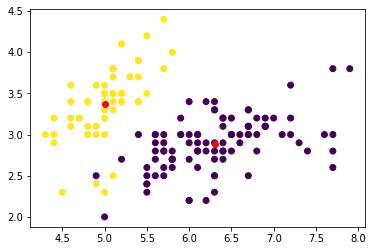

In [6]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=model.labels)
plt.scatter(model.centroids.iloc[:, 0], model.centroids.iloc[:, 1], c='red')

plt.show()

## Comparison to sklearn

In [6]:
from sklearn.cluster import KMeans

sk_model = KMeans(n_clusters=2) # n_clusters is the K in K-means.
sk_model.fit(x)

KMeans(n_clusters=2)

In [7]:
sk_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# Because centroids are stored in the model, we can use them to assign classes to new data points.
# Not really a prediction! Since in an unsupervised setting, we are not predicting existing labels.
sk_model.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

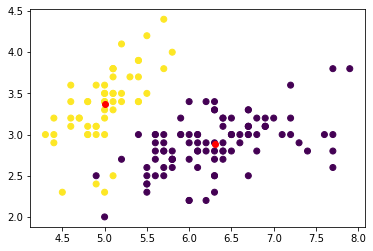

In [9]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=sk_model.labels_)
plt.scatter(sk_model.cluster_centers_[:, 0], sk_model.cluster_centers_[:, 1], c='red')

plt.show()

# Model selection
We can't use performance metrics such as the confusion matrix, accuracy, precision, recall, etc. because we don't have labels.

## Information criteria

The finer the granularity the better the fit, but the clustering is less meaningfull.

Information criteria balances both sides of the trade-off.

In [10]:
n = 10
scores = []
for i in range(1, n):
    sk_model = KMeans(n_clusters=i)
    sk_model.fit(x)
    scores.append(sk_model.score(x))

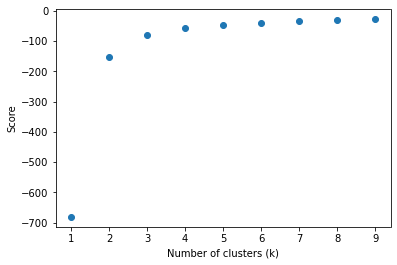

In [11]:
plt.scatter(range(1, n), scores)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.show()

### Calinski-Harabasz (CH) index
A good (high) CH index:
- Maximizes intercluster distances
- Minimizes intracluster variances
- Minimizes the number of clusters

In [12]:
from sklearn.metrics import calinski_harabasz_score

n = 10
ch_scores = []
for i in range(2, n): # Can't compute that score for 1 cluster.
    sk_model = KMeans(n_clusters=i)
    sk_model.fit(x)
    ch = calinski_harabasz_score(x, sk_model.labels_)
    ch_scores.append(ch)

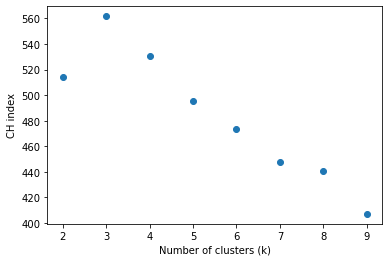

In [13]:
plt.scatter(range(2, n), ch_scores)

plt.xlabel('Number of clusters (k)')
plt.ylabel('CH index')

plt.show()

# Clustering != Classification
They both work on categorical data, but they are two essentially different problems.

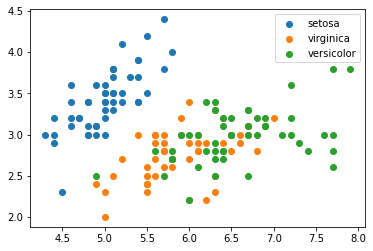

In [14]:
plt.scatter(x.iloc[:, 0][y == 0], x.iloc[:, 1][y == 0])
plt.scatter(x.iloc[:, 0][y == 1], x.iloc[:, 1][y == 1])
plt.scatter(x.iloc[:, 0][y == 2], x.iloc[:, 1][y == 2])

plt.legend(['setosa', 'virginica', 'versicolor'])

plt.show()

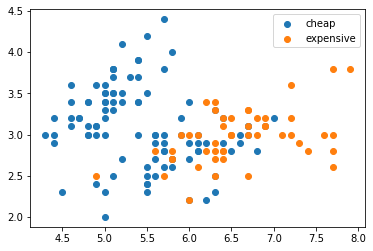

In [15]:
plt.scatter(x.iloc[:, 0][y != 2], x.iloc[:, 1][y != 2])
plt.scatter(x.iloc[:, 0][y == 2], x.iloc[:, 1][y == 2])

plt.legend(['cheap', 'expensive'])

plt.show()

In this case, a 2-group clustering would likely give us the setosa-vs-rest partition, but we are interested in the versicolor-vs-rest classification.

# A note on the continuous case: Mixture Models
We can use other models that assume a particular distribution.

Most commonly, we model the distribution of data points as a **mixture of Gaussian distributions**, in what is called a **Gaussian Mixture Model** (GMM). However, the distribution is better chosen according to the data, e.g. a Beta or Dirichlet distribution to model probabilities.

Mixture Models will give us, instead of a single cluster label per data point, its probability of belonging to each cluster (although we can convert those to cluster labels by selecting the cluster with highest probability).

## Model selection

The most common information criteria, the **Akaike Information Criterion** (AIC) and **Bayesian Information Criterion** (BIC) need those probabilities instead of just cluster labels, so they can't be directly used with K-means.